In [24]:
#!pip install --upgrade pip setuptools wheel
#!python -m pip install opencv-python
#!pip install matplotlib
#!pip freeze
#!pip install opencv-python-headless
#!pip install scikit-image
#!pip install -U scikit-fuzzy
#!pip install pandas
#!pip install scikit-learn
!pip install tqdm==4.40.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.0/55.0 KB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1


In [1]:
from matplotlib import pyplot as plt
import cv2
import os
import random
import pandas as pd
import numpy as np
from os.path import join
from skimage import measure
from skimage.feature import blob_dog, blob_log, blob_doh
import skfuzzy as fuzz
import library

### IMAGE PROCESSING - PREPROCESSING

In [3]:
# from bansal paper laplacian of gaussian + top hat morphology
# NOT FINISHED!!!!!!
def hairRemoval_LoG_THM(matrix, ksize = 3, kernel_size = 17, filterSize = (11, 11)):
    # 1. grayscale
    gray = cv2.cvtColor(matrix, cv2.COLOR_BGR2GRAY)
    
    # 2. laplacian of gaussian
    # steps are blurring,
    #           laplacian,
    #           zero_crossing,
    #           threshold zero crossing to extract strong edges
    ddepth = cv2.CV_16S
    blur = cv2.GaussianBlur(gray, (ksize, ksize), 0)
    lp = cv2.Laplacian(blur, ddepth, ksize=ksize)
    # converting output back to uint8
    log = cv2.convertScaleAbs(lp)

    # 3. closing and dilation
    kernel = cv2.getStructuringElement(1,(kernel_size,kernel_size))
    close = cv2.morphologyEx(log, cv2.MORPH_CLOSE, kernel)
    dil = cv2.dilate(close, kernel)
    
    # 4. top-hat transformation   
    kernel_th = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, 
                                          filterSize)
    
    tophat = cv2.morphologyEx(dil, 
                              cv2.MORPH_TOPHAT,
                              kernel_th)
    # 5. otsu
    #thresh = cv2.threshold(sharp, 0, 255, cv2.THRESH_OTSU )[1]
    # 6. erosion and closing
    # 7. impainting
    
    return log, close, dil, tophat

# MAIN

First pipeline with 

- hair removal
- segmentation with kmeans
- extracting asymmetry from the images

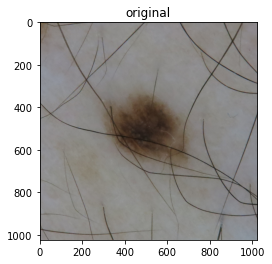

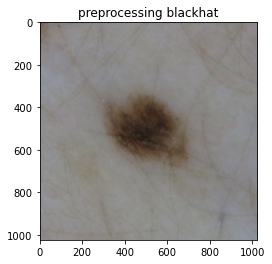

NameError: name 'segmentation_kmeans' is not defined

In [2]:
FOLDER_DIR = "/home/emily/Desktop/CAD/train/"

# img = cv2.imread(join(FOLDER_DIR,"nevus", "nev{}.jpg".format("03178")))
img = cv2.imread(join(FOLDER_DIR, "others", "{}.jpg".format("bkl00160")))
# 00656 02056 01831 00547 02237  02462 02655  03178 03284   04438  05209 bcc00220 bcc00242
# 04762 04176 cute
# 00246 05464 02758 02462 02379 shity
# 03863 finger
# others ack00291 ack00363 bcc00001 bc00103 ack00028 ack00180 ack00322 bcc00221 bcc00271 bkl00160 ack00021
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

nevus = np.array(img_rgb)
plt.imshow(img_rgb)
plt.title('original')
plt.show()

output_bh = library.hair_removal_BH(img)

plt.imshow(cv2.cvtColor(output_bh, cv2.COLOR_BGR2RGB))
plt.title('preprocessing blackhat')
plt.show()


mask = segmentation_kmeans(output_bh)

plt.imshow(mask, cmap='gray')
plt.title('mask')
plt.show()

# print('mask.shape ', mask.shape)

# bg = output_bh.copy()
# fg = output_bh.copy()

# bg[mask == 0]
# fg[mask != 0]


# plt.imshow(bg)
# plt.show()


# plt.imshow(fg)
# plt.show()


# colormean = mean_std(bg)

asy = asymmetry(mask, False)
print('asymmetry value: ', asy)



Test with 1000 images to generate asymmetry

In [32]:
import library
import color_features

samples = library.get_sample(amount=2000)

dictF = {}
features = pd.DataFrame()

for sample in samples:
    #print('name ', sample)
    img = cv2.imread(sample)
    output_bh = library.hair_removal_BH(img)
    #mask = segmentation_kmeans(output_bh)
    #asy = asymmetry(mask, False)
    
    dictF['name'] = sample
    dictF['label'] = (0 if 'nevus' in sample else 1 )
    
    value_features, name_features = color_features.extract_color_features(output_bh)
    
    colors = {name_features[i]: value_features[i] for i in range(len(name_features))}
    
    dictF.update(colors)
    features = features.append(dictF, ignore_index=True)
    dictF.clear()
    
features.to_csv(os.path.join('/home',
                             'emily',
                             'Desktop',
                             'CAD',
                             'features_paola.csv'),
                    mode='a',
                    index=False)

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = features.append(dictF, ignore_index=True)
/tmp/ipykernel_22583/3955053341.py:24: FutureWarning: The frame.append method is deprecated 

# SEGMENTATION

K-means

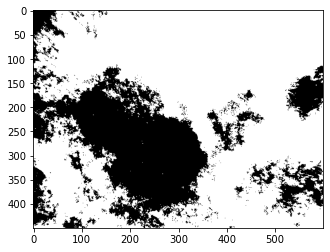

In [9]:
def segmentation_kmeans(hairless):
    # color space change
    hairless = cv2.cvtColor(output_bh, cv2.COLOR_BGR2RGB)
    # reshape the image to be a list of pixels
    data = hairless.reshape((hairless.shape[0] * hairless.shape[1], 3))
    data = np.float32(data)

    # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # Set flags (Just to avoid line break in the code)
    flags = cv2.KMEANS_RANDOM_CENTERS

    # Apply KMeans
    compactness,labels,centers = cv2.kmeans(data,2,None,criteria,10,flags)

    centers = np.uint8(centers)
    res = centers[labels.flatten()]
    res2 = res.reshape((hairless.shape))

    gray = cv2.cvtColor(res2, cv2.COLOR_RGB2GRAY)

    mask = cv2.normalize(gray, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    #mask = gray / np.max(gray)


#     plt.imshow(mask, cmap='gray')
        
    blobs_labels, count = measure.label(mask, background=0, return_num=True) #Getting labels of the connected components and the amount of them without considering the count

    # https://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops   
    # regionprops give us back a lot of properties including area and centroids
    props = measure.regionprops(blobs_labels)
    
    areamax = 0
    labelmax = 0
    for prop in props:
      if ((prop.area > areamax) and (prop.label != 0)):
        areamax = prop.area
        labelmax = prop.label
    
    mask[blobs_labels == labelmax ] = 1

    return mask

result = segmentation_kmeans(hairless)

plt.imshow(result, cmap='gray')

# buscar objetos y quedarme con el mas grande y centrado

tomar del centro path con muestra de color para segmentacion, el threshold a tomar

fuzzy c-means 

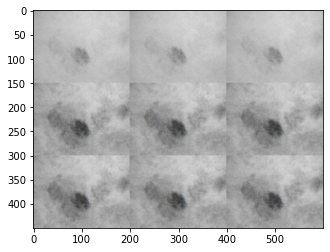

In [8]:
def change_color_fuzzycmeans(cluster_membership, clusters):

    img = []
    for pix in cluster_membership.T:
        img.append(clusters[np.argmax(pix)])
    return img

def imclearborder(imgBW):

    # Given a black and white image, first find all of its contours
    radius = 2
    imgBWcopy = imgBW.copy()
    image, contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # Get dimensions of image
    imgRows = imgBW.shape[0]
    imgCols = imgBW.shape[1]    

    contourList = [] # ID list of contours that touch the border

    # For each contour...
    for idx in np.arange(len(contours)):
        # Get the i'th contour
        cnt = contours[idx]

        # Look at each point in the contour
        for pt in cnt:
            rowCnt = pt[0][1]
            colCnt = pt[0][0]

            # If this is within the radius of the border
            # this contour goes bye bye!
            check1 = (rowCnt >= 0 and rowCnt < radius) or (rowCnt >= imgRows-1-radius and rowCnt < imgRows)
            check2 = (colCnt >= 0 and colCnt < radius) or (colCnt >= imgCols-1-radius and colCnt < imgCols)

            if check1 or check2:
                contourList.append(idx)
                break

    for idx in contourList:
        cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy

#### bwareaopen definition
def bwareaopen(imgBW, areaPixels):
    # Given a black and white image, first find all of its contours
    imgBWcopy = imgBW.copy()
    image, contours,hierarchy = cv2.findContours(imgBWcopy.copy(), cv2.RETR_LIST, 
        cv2.CHAIN_APPROX_SIMPLE)

    # For each contour, determine its total occupying area
    for idx in np.arange(len(contours)):
        area = cv2.contourArea(contours[idx])
        if (area >= 0 and area <= areaPixels):
            cv2.drawContours(imgBWcopy, contours, idx, (0,0,0), -1)

    return imgBWcopy      

def imfill(im_th):
    
    im_floodfill = im_th.copy()
    # Mask used to flood filling.
    
    # Notice the size needs to be 2 pixels than the image.
    h, w = im_th.shape[:2]
    mask = np.zeros((h+2, w+2), np.uint8)

    # Floodfill from point (0, 0)
    cv2.floodFill(im_floodfill, mask, (0,0), 255);

    # Invert floodfilled image
    im_floodfill_inv = cv2.bitwise_not(im_floodfill)

    # Combine the two images to get the foreground.
    im_out = im_th | im_floodfill_inv
    
    return im_out



ncenters = 2

hairless = cv2.cvtColor(output_bh, cv2.COLOR_BGR2RGB)
# reshape the image to be a list of pixels
data = hairless.reshape((hairless.shape[0] * hairless.shape[1], 3))
data = np.float32(data)

cntr, u_fonc, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data, ncenters, 2, error=0.005, maxiter=1000, init=None)

fcmimg = change_color_fuzzycmeans(u_fonc, cntr)

fcmimg = np.reshape(fcmimg, hairless.shape).astype(np.uint8)

plt.imshow(fcmimg)

# ret, seg_img = cv2.threshold(fcmimg,np.max(fcmimg)-1,255,cv2.THRESH_BINARY)



# bwfim1 = bwareaopen(seg_img, 100)
# bwfim2 = imclearborder(bwfim1)
# bwfim3 = imfill(bwfim2)

# plt.imshow(bwfim3)
# plt.title(name)

# FEATURES EXTRACTION

## ABCD Rule

commonly used feature extraction method from dermoscopic images is based on the ABCD rule of dermatoscopu nachbar et al 1994.  this method consider 4 criteria: 

- asymmetry: if you draw a like through the half of the mole and the halfs are different. its asymetrical
- border structure
- color variation
- diameter of skin lesion.

inspiration for code from

https://github.com/sohum2002/melanoma-detection/blob/master/melanoma/feature_extraction/asymmetry_index.py
https://github.com/hadikhanhk786/melanoma-detection-python/blob/master/src/Lesion.py
https://github.com/RCharradi/Melanoma-detection-from-dermoscopy-images-

 ### ASYMMETRY


centroid  (525.4913615438146, 483.79501231197474)


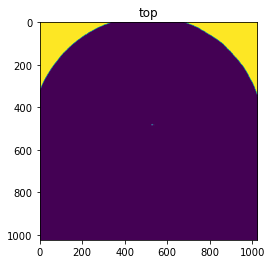

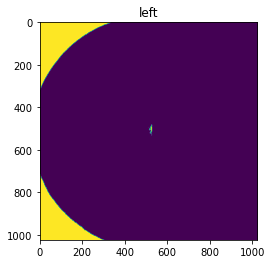

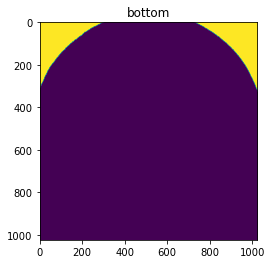

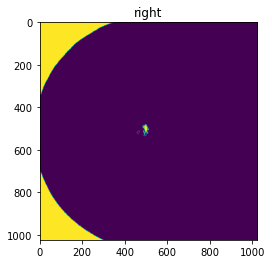

69164.0
79624.0
71813.0
77895.0
symmetry  0.1047234464271053


In [11]:
# https://github.com/sohum2002/melanoma-detection/blob/master/melanoma/feature_extraction/asymmetry_index.py

def checkOverlap(shape1, shape2):
    #Find the accuracy of symmetry
    all_pixels = 0.
    correct = 0.
    wrong = 0.

    for i in range(shape1.shape[0]):
        for j in range(shape1.shape[1]):

            curr_pixel1 = (shape1[i][j])
            curr_pixel2 = (shape2[i][j])

            if(curr_pixel1 or curr_pixel2):
                all_pixels += 1
                if(curr_pixel1 and curr_pixel2):
                    correct += 1
                else:
                    wrong += 1

    return correct, wrong, all_pixels

def asymmetry(mask, flag):
    
    # 0. variables
    x = []
    y = []
    top  = np.zeros((mask.shape[0], mask.shape[1]), dtype=bool)
    left = np.zeros((mask.shape[0], mask.shape[1]), dtype=bool)
    bottom = np.zeros((mask.shape[0], mask.shape[1]), dtype=bool)
    right = np.zeros((mask.shape[0], mask.shape[1]), dtype=bool)
    
    # 1. find the center of the image
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (mask[i][j] != 1):
                x.append(j)
                y.append(i)
    
    # centroid = ( gray.shape[0] / 2, gray.shape[1] / 2) # need to change if segmentation maskk
    centroid = (sum(x) / len(x), sum(y) / len(y))
    print('centroid ', centroid)
    
    # print(np.unique(mask))
    
    # 2. split top/down images
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (mask[i][j] < 1):
                if (i < centroid[1]):
                    top[i][j] = True
    if flag:
        plt.imshow(top)
        plt.title('top')
        plt.show()
    
    # 4. split left/right images
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if (mask[i][j] < 0.95):
                if (j < centroid[0]):
                    left[i][j] = True
    if flag:
        plt.imshow(left)
        plt.title('left')
        plt.show()
    
    # doing for flip top/down images
    flipped_ud = np.flipud(mask)
    
    for i in range(flipped_ud.shape[0]):
        for j in range(flipped_ud.shape[1]):
            if(flipped_ud[i][j] < 0.95):
                if(i < centroid[1]):
                    bottom[i][j] = True
    
    if flag:
        plt.imshow(bottom)
        plt.title('bottom')
        plt.show()
    
    # doing for flip left/right to get the right part
    flipped_lr = np.fliplr(mask)
    
    # performing splitting for top/down images
    for i in range(flipped_lr.shape[0]):
        for j in range(flipped_lr.shape[1]):
            if(flipped_lr[i][j] < 0.95):
                if(j < centroid[0]):
                    right[i][j] = True
    if flag:
        plt.imshow(right)
        plt.title('right')
        plt.show()        
        
    correct_TB, wrong_TB, all_TB = checkOverlap(top, bottom)
    correct_LR, wrong_LR, all_LR = checkOverlap(left, right)
    
    if flag:
        print(correct_TB)
        print(all_TB)
        print(correct_LR)
        print(all_LR)
    
    return 1- sum([correct_TB / all_TB, correct_LR / all_LR]) / 2

result_asym = asymmetry(mask, True)

print('symmetry ', result_asym)

# MACHINE LEARNING